In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Data Generation
# data generate X,Y
m = 100
X = np.random.randn(m)

print(X)

[ 1.89112251 -0.88796057  0.85989586 -1.17250208 -0.16985434 -0.39276247
  0.36144966  0.27814364 -2.02235612  0.69784545  0.90946369  0.1323033
  0.27066059  1.16151822  0.17908225  0.46164193  0.67794264  0.87902306
  0.37382866 -0.29169633 -0.29111782  0.43047175 -0.74311257 -1.33058365
 -0.38230976 -0.94082308 -0.00498952  1.18520508  0.48575396  1.85102606
 -1.20508794  0.0903205   0.56170709  2.32238136  0.5790974   0.52855078
 -0.73391632  1.04963218  0.02805658  0.74783009 -0.91452372 -0.03824749
 -0.7670697   0.95076334  0.88386672 -0.34590002 -0.17174346  0.80094224
  0.22856499 -0.50421969 -1.90355795 -1.0664358  -0.89149315 -0.17866659
  0.77683921 -0.4728797   0.73556041  0.17539113 -1.22869922 -0.70165084
  1.22713919 -0.81753736 -0.29182774  0.94702355  1.06751239 -0.35842168
 -1.06900814  0.36265639 -1.04387865  0.304961   -0.28008187  2.04646231
  0.36760401 -0.90737933  2.12032892  0.54250553  0.07044383  0.974692
  0.39681464 -0.85601346  1.24489639 -0.22318238 -0.52

In [9]:
# data generate X,Y
m = 100
X = np.random.randn(m) * 10

print(X.mean(), X.std())

-0.9910091897029473 9.030253535920366


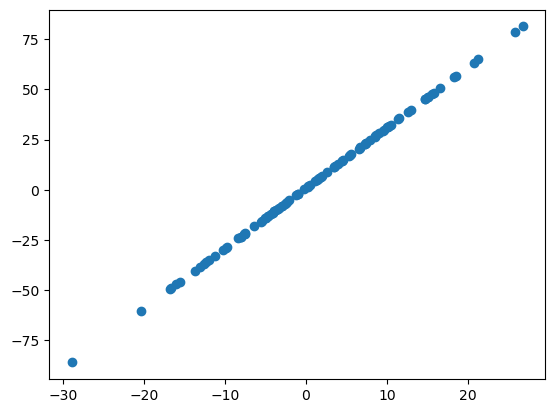

In [11]:
# data generate X,Y
m = 100
X = np.random.randn(m) * 10
Y = 3*X + 1

plt.scatter(X,Y)
plt.show()

In [12]:
Y.shape

(100,)

In [13]:
X.shape

(100,)

In [13]:
# both X and Y are arrays

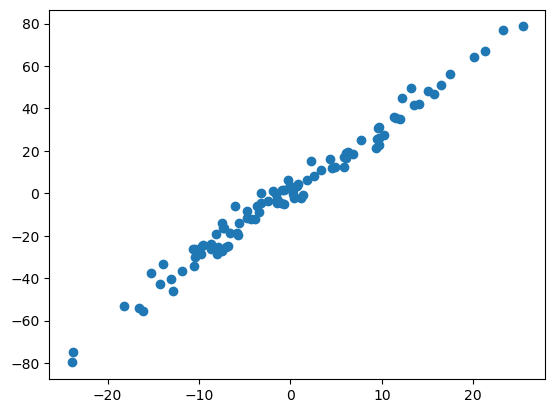

In [14]:
# adding noise
m = 100
X = np.random.randn(m) * 10
noise = np.random.randn(m)
Y = 3*X + 1 + 4* noise   # multiplying noise by 4 to make the graph clear so that we can see the noise

plt.scatter(X,Y)
plt.show()

In [16]:
# you can see that in the above graph the line is not straight when compared to the previous graph. This is because of the added noise.

In [15]:
# making this a function

def generateDataset(m):
    X = np.random.randn(m) * 10
    noise = np.random.randn(m)
    y = 3*X + 1 + 4* noise 
    return X,y

In [16]:
X,y = generateDataset(100)
print(X.shape, Y.shape)

(100,) (100,)


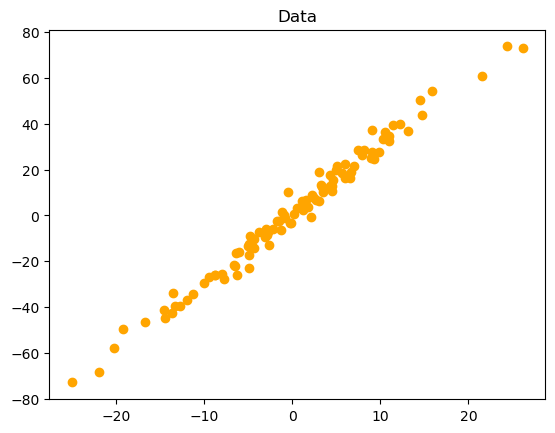

In [17]:
def plotData(X,y, color="orange", title="Data"):
    plt.title(title)
    plt.scatter(X,y,c=color)
    plt.show()

plotData(X,y)

In [26]:
# Linear regression - Data Normalization

In [18]:
def normaliseData(X):
    X = (X-X.mean())/X.std()
    return X

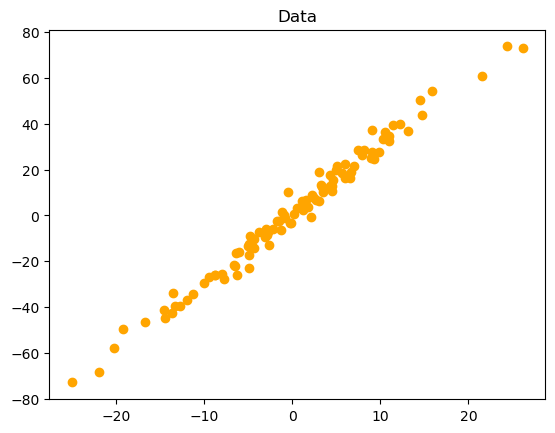

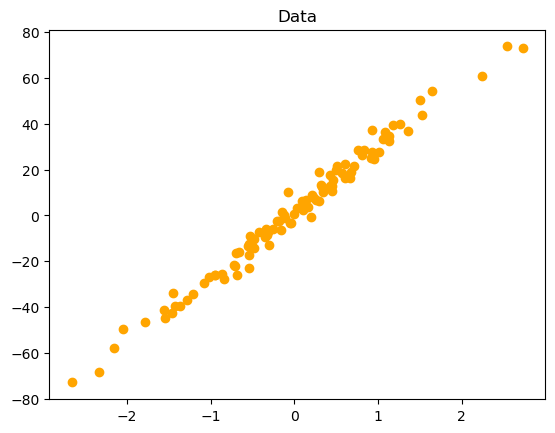

In [19]:
# without normalization
plotData(X,y)

# with normalization
X = normaliseData(X)
plotData(X,y)

In [45]:
# check the x-axis of the above 2 graph.

In [46]:
# Train Test Split 

In [20]:
def trainTestSplit(X,y,split=0.8):   # Here I will keep 80% of the data for training and 20% for testing
    m = X.shape[0]
    data = np.zeros((m,2))   

    data[:,0] = X
    data[:,1] = y

    np.random.shuffle(data)

    split = int(m*split)

# Here we will shuffle all the values with X and its corresponding y value together.    

    XT = data[:split,0]
    yT = data[:split,1]

    Xt = data[split: ,0]
    yt = data[split: ,1]

    return XT, yT, Xt, yt

In [21]:
XT, yT, Xt, yt = trainTestSplit(X,y)

In [22]:
print(Xt.shape, yT.shape)
print(Xt.shape, yt.shape)

(20,) (80,)
(20,) (20,)


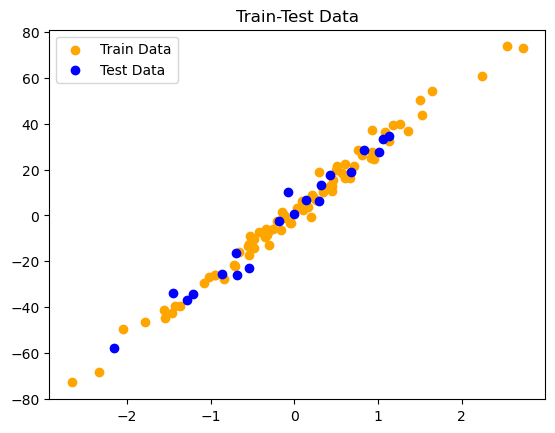

In [23]:
plt.scatter(XT, yT, color='orange', label="Train Data")
plt.scatter(Xt, yt, color='blue', label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

In [1]:
# Hypothesis

In [42]:
def hypothesis(X,theta):
    return theta[0] + theta[1]*X

def error(X,y,theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_i = hypothesis(X[i], theta)
        e = e + (y[i]-y_i)**2

    return e/(2*m)

def gradient(X,y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        exp = hypothesis(X[i], theta) - y[i]
        grad[0] += (exp)
        grad[1] += (exp)*X[i]

    return grad/m

def train(X,y, learning_rate = 0.1):
    theta = np.zeros((2,))

    maxItrs = 100
    error_list = []
    
    for i in range(maxItrs):
        grad = gradient(X,y, theta)
        error_list.append(error(X,y,theta))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    plt.xlabel("Iteration Number")
    plt.ylabel("Loss")        
    plt.plot(error_list)
    return theta
    

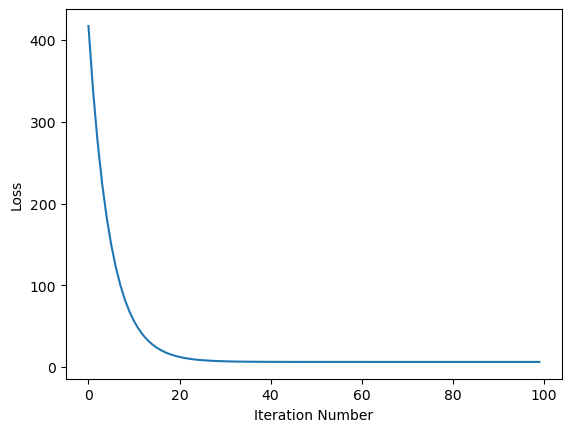

In [43]:
theta = train(X,y)

In [44]:
theta

array([ 1.70262233, 28.61446246])

In [49]:
def predict(X,theta):
   #  return theta[0] + theta[1]*X
    return hypothesis(X, theta)

In [45]:
# prediction

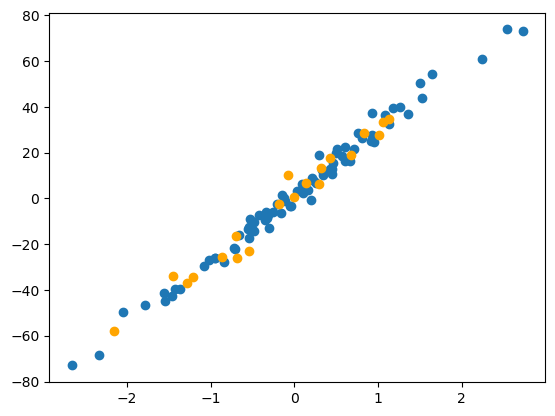

In [50]:
plt.scatter(XT,yT)
plt.scatter(Xt, yt, color='orange')
plt.show()

In [52]:
yp = predict(Xt, theta)

In [53]:
Xt.shape

(20,)

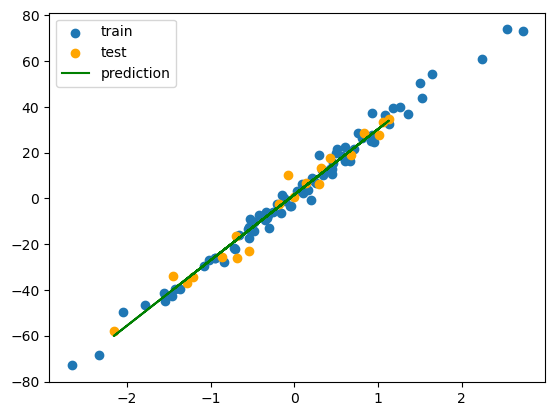

In [57]:
plt.scatter(XT, yT, label="train")
plt.scatter(Xt, yt, color='orange', label="test")
plt.plot(Xt, yp, color='green', label="prediction")
plt.legend()
plt.show()
